In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy.stats import t
from sklearn.decomposition import PCA, IncrementalPCA, TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Lets try out some stuff on a super small dataframe

In [3]:
# intialise data of lists. 
data = {'Name':['Tom', 'nick', 'krish', 'nan'], 'Age':[np.nan, 21, 19, 22], 'Sex':['M', 'M', 'F', 'M'], 'Footwear':['Sandals', 'Shoes', 'Sandals', 'Shoes']} 
  
# Create DataFrame 
df_sample = pd.DataFrame(data) 
  
# Print the output. 
df_sample

,Name,Age,Sex,Footwear
0,Tom,nan,M,Sandals
1,nick,21.000,M,Shoes
2,krish,19.000,F,Sandals
3,nan,22.000,M,Shoes


### get rid of nulls

In [4]:
imp = SimpleImputer(strategy='most_frequent')

In [5]:
imp.fit(df_sample)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [6]:
df_imp = imp.transform(df_sample)

In [7]:
df_imp

array([['Tom', 19.0, 'M', 'Sandals'],
       ['nick', 21.0, 'M', 'Shoes'],
       ['krish', 19.0, 'F', 'Sandals'],
       ['nan', 22.0, 'M', 'Shoes']], dtype=object)

### split the dataframe into X and y

In [8]:
X_df = df_sample['Footwear']
X_df

0    Sandals
1      Shoes
2    Sandals
3      Shoes
Name: Footwear, dtype: object

In [9]:
y_df = df_sample.drop(['Footwear'], axis=1)
y_df

,Name,Age,Sex
0,Tom,nan,M
1,nick,21.000,M
2,krish,19.000,F
3,nan,22.000,M


In [10]:
# Get dummies
df_sample_dummies = pd.get_dummies(y_df, prefix_sep='_', drop_first=True)

# X head
print(df_sample_dummies)

     Age  Name_krish  Name_nan  Name_nick  Sex_M
0    nan           0         0          0      1
1 21.000           0         0          1      1
2 19.000           1         0          0      0
3 22.000           0         1          0      1


In [11]:
# Get sparse dummies
df_sample_sparse_dummies = pd.get_dummies(df_sample, prefix_sep='_', drop_first=True, sparse=True)

# X head
print(df_sample_sparse_dummies)

     Age  Name_krish  Name_nan  Name_nick  Sex_M  Footwear_Shoes
0    nan           0         0          0      1               0
1 21.000           0         0          1      1               1
2 19.000           1         0          0      0               0
3 22.000           0         1          0      1               1


In [12]:
df_sample_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
Age           3 non-null float64
Name_krish    4 non-null uint8
Name_nan      4 non-null uint8
Name_nick     4 non-null uint8
Sex_M         4 non-null uint8
dtypes: float64(1), uint8(4)
memory usage: 128.0 bytes


In [13]:
df_sample_sparse_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
Age               -5 non-null float64
Name_krish        -4 non-null Sparse[uint8, 0]
Name_nan          -4 non-null Sparse[uint8, 0]
Name_nick         -4 non-null Sparse[uint8, 0]
Sex_M             -4 non-null Sparse[uint8, 0]
Footwear_Shoes    -4 non-null Sparse[uint8, 0]
dtypes: Sparse[uint8, 0](5), float64(1)
memory usage: 152.0 bytes


In [14]:
from sklearn.cluster import KMeans
# dictionary to fill with the single square errors
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 5):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_sample_sparse_dummies)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ 
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [15]:
pca = PCA(n_components=2)
y_pca = pca.fit_transform(df_sample_sparse_dummies)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [16]:
y_pca

NameError: name 'y_pca' is not defined

# Let's try it on the big dataset

In [17]:
df = pd.read_csv('Data/Loan_Storied.csv',low_memory=False,index_col=0, 
                parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                               'debt_settlement_flag_date', 'settlement_date','sec_app_earliest_cr_line'])

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,NaN,10.000,RENT,24000.000,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,1985-01-01,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,2015-01-01,171.620,NaT,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,Ryder,0.500,RENT,30000.000,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,1999-04-01,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,2013-04-01,119.660,NaT,2016-10-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,NaN,10.000,RENT,12252.000,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422722 entries, 0 to 1422721
Columns: 142 entries, loan_amnt to meets_credit_policy
dtypes: bool(1), datetime64[ns](8), float64(108), object(25)
memory usage: 1.5+ GB


We need to get rid of columns that contain information that happens after a loan has been given out, such as hardships.  This is really an important step and it also helps us downsize our dataset a little bit.  

In [20]:
drop_list = ['collection_recovery_fee', 'debt_settlement_flag','debt_settlement_flag_date','deferral_term','delinq_amnt','hardship_amount','hardship_dpd', 'hardship_end_date', 'hardship_flag','hardship_last_payment_amount','hardship_length', 'hardship_loan_status','hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'last_pymnt_amnt','last_pymnt_d','next_pymnt_d','orig_projected_additional_accrued_interest','out_prncp','out_prncp_inv','payment_plan_start_date','pymnt_plan','recoveries','settlement_amount','settlement_date','settlement_percentage','settlement_status','settlement_term','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','desc','zip_code','title','emp_title']
df = df.drop(drop_list, axis=1)

### And now lets change the dates to floats by subtracting to or from the issue date

In [21]:
df['issue_d_minus_earliest_cr_line'] = (df['issue_d']-df['earliest_cr_line']).dt.days
df['last_credit_pull_d_minus_issue_d'] = (df['last_credit_pull_d']-df['issue_d']).dt.days
df['issue_d_minus_sec_app_earliest_cr_line'] = (df['issue_d']-df['sec_app_earliest_cr_line']).dt.days

### Drop the date fields

In [22]:
dt_drop_list = ['issue_d','earliest_cr_line','last_credit_pull_d','sec_app_earliest_cr_line']
df = df.drop(dt_drop_list, axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_length_years,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,meets_credit_policy,issue_d_minus_earliest_cr_line,last_credit_pull_d_minus_issue_d,issue_d_minus_sec_app_earliest_cr_line
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,10.000,RENT,24000.000,Verified,Fully Paid,credit_card,AZ,27.650,0.000,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,9830.000,2708.000,nan
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,0.500,RENT,30000.000,Source Verified,Charged Off,car,GA,1.000,0.000,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,4627.000,1766.000,nan
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,10.000,RENT,12252.000,Not Verified,Fully Paid,small_business,IL,8.720,0.000,2.000,nan,nan,2.000,0.000,2956.000,0.985,10.000,f,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,3682.000,2009.000,nan
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,C,C1,10.000,RENT,49200.000,Source Verified,Fully Paid,other,CA,20.000,0.000,1.000,35.000,nan,10.000,0.000,5598.000,0.210,37.000,f,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,5782.000,1583.000,nan
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,B,B5,1.000,RENT,80000.000,Source Verified,Fully Paid,other,OR,17.940,0.000,0.000,38.000,nan,15.000,0.000,27783.000,0.539,38.000,f,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

### Convert Default to Charged Off since it is the same outcome 

In [23]:
df['loan_status'] = np.where(df['loan_status'] == 'Default','Charged Off',df['loan_status'])
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

# Get rid of null values

In [24]:
df.isnull().sum()

loan_amnt                                       0
funded_amnt                                     0
funded_amnt_inv                                 0
term_months                                     0
int_rate_pct                                    0
installment                                     0
grade                                           0
sub_grade                                       0
emp_length_years                            84136
home_ownership                                  0
annual_inc                                      4
verification_status                             0
loan_status                                     0
purpose                                         0
addr_state                                      0
dti                                           461
delinq_2yrs                                    29
inq_last_6mths                                 30
mths_since_last_delinq                     717293
mths_since_last_record                    1180462


In [25]:
imp_con = SimpleImputer(strategy='constant',fill_value='Not Verified')

In [26]:
df.loc[:,'verification_status_joint'] = imp_con.fit_transform(df.loc[:,'verification_status_joint'].to_numpy().reshape(-1,1))

In [27]:
imp_mean = SimpleImputer()

In [28]:
df.loc[:,'emp_length_years'] = imp_mean.fit_transform(df.loc[:,'emp_length_years'].to_numpy().reshape(-1,1))

In [29]:
df.loc[:,'annual_inc'] = imp_mean.fit_transform(df.loc[:,'annual_inc'].to_numpy().reshape(-1,1))

In [30]:
df.iloc[:,15:25] = imp_mean.fit_transform(df.iloc[:,15:25])

In [31]:
df.iloc[:,26:28] = imp_mean.fit_transform(df.iloc[:,26:28])

In [32]:
df.iloc[:,30:32] = imp_mean.fit_transform(df.iloc[:,30:32])

In [36]:
df.iloc[:,33:97] = imp_mean.fit_transform(df.iloc[:,33:97])

In [33]:
df.iloc[:,98:101] = imp_mean.fit_transform(df.iloc[:,98:101])

In [38]:
df.isnull().sum().sum()

0

### Let's use a Heatmap and see if we can get rid of correlated data

Here we are creating a quick function that will create a heatmap. This heat map will show correlation between columns. 

In [39]:
def heatMap(df, mirror=False):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(100, 100))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

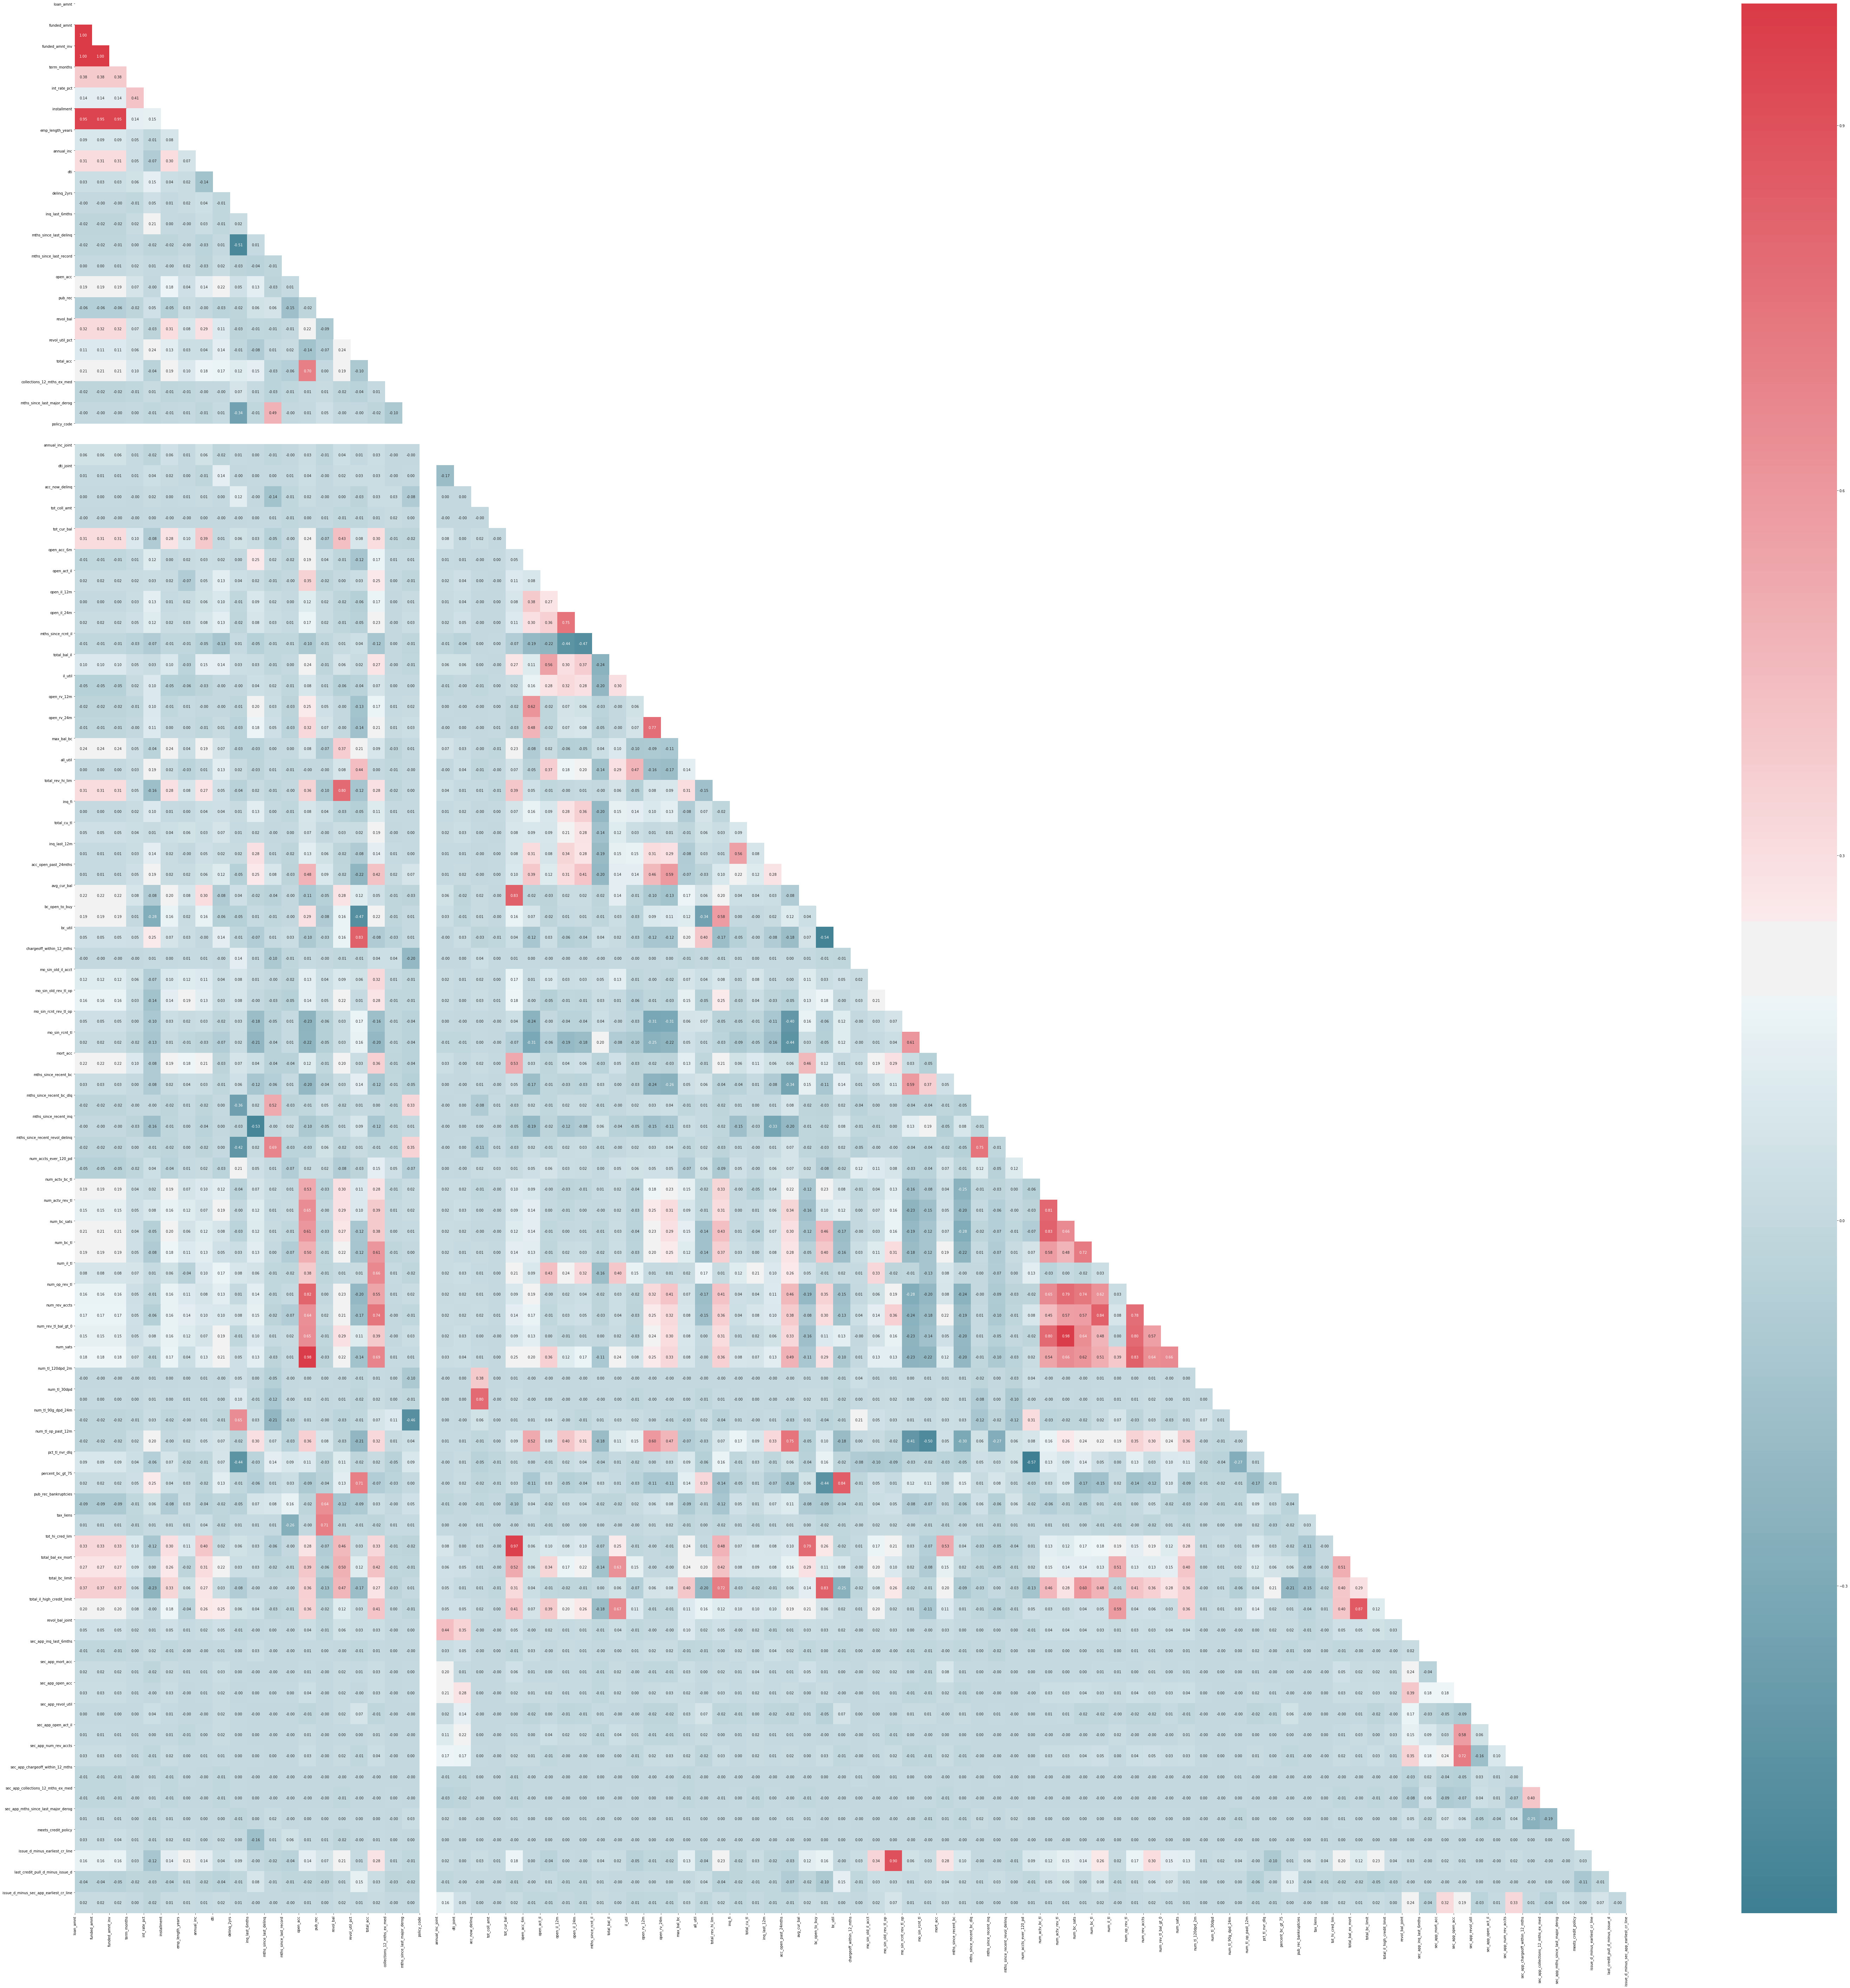

In [40]:
heatMap(df)

In [41]:
corr_drop_list = ['funded_amnt','funded_amnt_inv','installment','open_acc','tot_cur_bal','total_bal_il','num_rev_tl_bal_gt_0','mo_sin_old_rev_tl_op']
df = df.drop(corr_drop_list, axis=1)

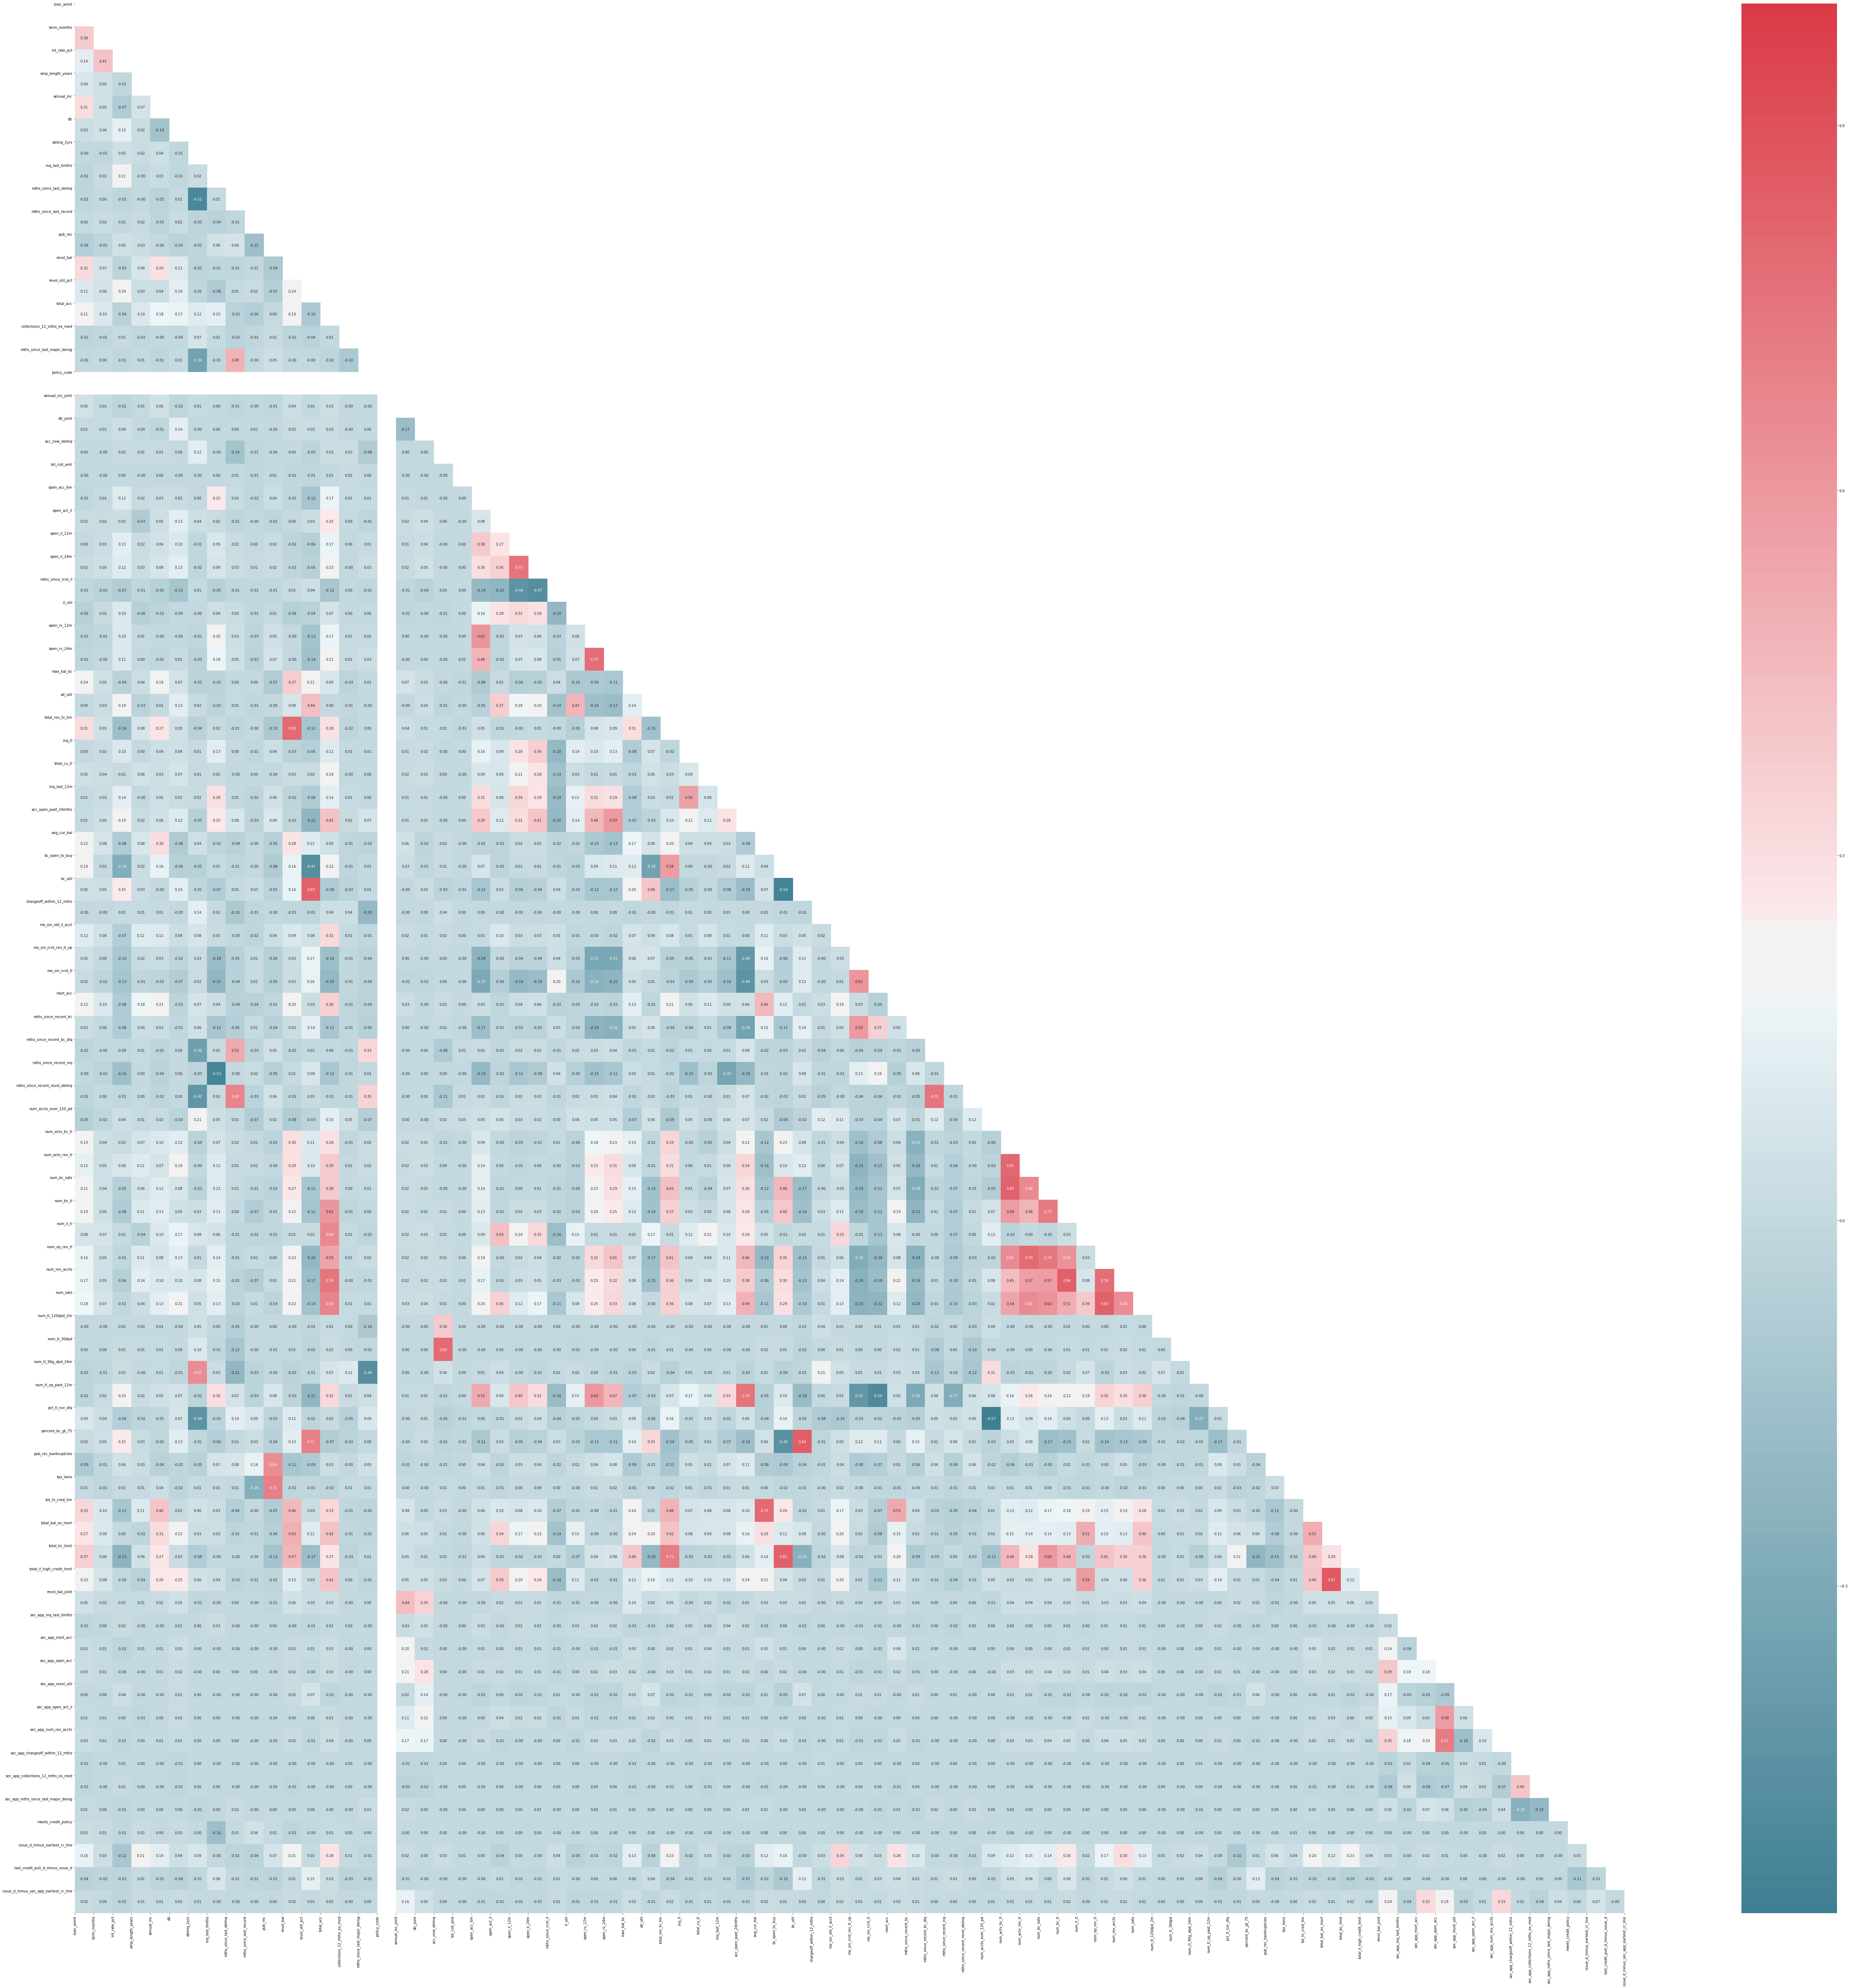

In [42]:
heatMap(df)

In [43]:
sorted(df)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'dti_joint',
 'emp_length_years',
 'grade',
 'home_ownership',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'int_rate_pct',
 'issue_d_minus_earliest_cr_line',
 'issue_d_minus_sec_app_earliest_cr_line',
 'last_credit_pull_d_minus_issue_d',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'meets_credit_policy',
 'mo_sin_old_il_acct',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422722 entries, 0 to 1422721
Data columns (total 93 columns):
loan_amnt                                 1422722 non-null float64
term_months                               1422722 non-null float64
int_rate_pct                              1422722 non-null float64
grade                                     1422722 non-null object
sub_grade                                 1422722 non-null object
emp_length_years                          1422722 non-null float64
home_ownership                            1422722 non-null object
annual_inc                                1422722 non-null float64
verification_status                       1422722 non-null object
loan_status                               1422722 non-null object
purpose                                   1422722 non-null object
addr_state                                1422722 non-null object
dti                                       1422722 non-null float64
delinq_2yrs            

# These are the object datatype variables that will need to be changed to numeric variables.  

In [45]:
obj_list = sorted(list(df.select_dtypes(include=['object']).columns))
for i in range(len(obj_list)):
    print(obj_list[i])
    print(len(df[obj_list[i]].unique()))
    print(df[obj_list[i]].unique())
    print("--------------------------")

addr_state
51
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME' 'ND']
--------------------------
application_type
2
['Individual' 'Joint App']
--------------------------
grade
7
['B' 'C' 'A' 'E' 'F' 'D' 'G']
--------------------------
home_ownership
6
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
--------------------------
initial_list_status
2
['f' 'w']
--------------------------
loan_status
2
['Fully Paid' 'Charged Off']
--------------------------
purpose
14
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
--------------------------
sub_grade
35
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' '

In [46]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422722 entries, 0 to 1422721
Columns: 198 entries, loan_amnt to verification_status_joint_Verified
dtypes: bool(1), float64(82), uint8(115)
memory usage: 1.0 GB


In [48]:
df.dtypes

loan_amnt                                    float64
term_months                                  float64
int_rate_pct                                 float64
emp_length_years                             float64
annual_inc                                   float64
dti                                          float64
delinq_2yrs                                  float64
inq_last_6mths                               float64
mths_since_last_delinq                       float64
mths_since_last_record                       float64
pub_rec                                      float64
revol_bal                                    float64
revol_util_pct                               float64
total_acc                                    float64
collections_12_mths_ex_med                   float64
mths_since_last_major_derog                  float64
policy_code                                  float64
annual_inc_joint                             float64
dti_joint                                    f

# Split the dataset into X and y datasets

In [49]:
df_X = df['loan_status_Fully Paid']
df_X.head(20)

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    1
19    1
Name: loan_status_Fully Paid, dtype: uint8

In [50]:
y_drop_list = ['loan_status_Fully Paid']
df_y = df.drop(y_drop_list, axis=1)
df_y.head()

,loan_amnt,term_months,int_rate_pct,emp_length_years,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,revol_util_pct,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,meets_credit_policy,issue_d_minus_earliest_cr_line,last_credit_pull_d_minus_issue_d,issue_d_minus_sec_app_earliest_cr_line,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,verification_status_joint_Source Verified,verification_status_joint_Verified
0,5000.000,36.000,0.106,10.000,24000.000,27.650,0.000,1.000,34.286,70.542,0.000,13648.000,0.837,9.000,0.000,43.730,1.000,117626.681,18.899,0.000,249.100,1.039,2.787,0.766,1.721,19.814,71.199,1.408,2.980,5543.128,58.085,32906.673,1.084,1.592,2.284,4.686,13487.702,10284.598,59.715,0.000,125.747,13.171,7.880,1.660,23.870,39.597,6.733,35.780,0.510,3.643,5.640,4.736,8.063,8.558,8.276,14.555,11.638,0.001,0.003,0.089,2.175,94.147,44.872,0.000,0.000,174616.241,49752.641,21733.868,42261.115,31407.695,0.743,1.646,11.314,57.187,2.954,12.760,0.055,0.087,36.724,True,9830.000,2708.000,5467.682,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.000,60.000,0.153,0.500,30000.

### Let's split it into Testing and Training datasets
We want to split the data two times.  We want a dataset for training the models and selecting hyperparameters, then another dataset for testing which can be used to compare the models against one another, and then a final dataset for testing our slected model.  Since we need three groups of data we will split the data twice.  

In [51]:
X_int_train, X_final_test, y_int_train, y_final_test =train_test_split(df_X, df_y, test_size=0.2,random_state=1)

In [52]:
X_train, X_model_test, y_train, y_model_test =train_test_split(X_int_train, y_int_train, test_size=0.2,random_state=1)

In [53]:
X_train.head()

906413    1
508822    1
467114    1
307718    1
832907    1
Name: loan_status_Fully Paid, dtype: uint8

In [54]:
y_train.head()

,loan_amnt,term_months,int_rate_pct,emp_length_years,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,revol_util_pct,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,meets_credit_policy,issue_d_minus_earliest_cr_line,last_credit_pull_d_minus_issue_d,issue_d_minus_sec_app_earliest_cr_line,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,verification_status_joint_Source Verified,verification_status_joint_Verified
906413,28000.000,36.000,0.153,10.000,190000.000,16.000,0.000,1.000,61.000,70.542,0.000,19836.000,0.290,28.000,0.000,43.730,1.000,117626.681,18.899,0.000,0.000,3.000,3.000,1.000,2.000,6.000,32.000,3.000,6.000,3446.000,29.000,68300.000,0.000,2.000,7.000,9.000,19623.000,14495.000,35.900,0.000,132.000,2.000,2.000,2.000,5.000,39.597,5.000,35.780,0.000,5.000,11.000,8.000,8.000,5.000,18.000,20.000,22.000,0.000,0.000,0.000,4.000,100.000,0.000,0.000,0.000,481966.000,139108.000,22600.000,135666.000,31407.695,0.743,1.646,11.314,57.187,2.954,12.760,0.055,0.087,36.724,True,4017.000,881.000,5467.682,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
508822,8400.000,36.000,0.053,1

In [55]:
#param_grid = {'n_neighbors': np.arange(1, 50)}
#knn = KNeighborsClassifier()
#knn_cv = GridSearchCV(knn, param_grid, cv=5)
#knn_cv.fit(X, y)
#knn_cv.best_params_
#knn_cv.best_score_

In [73]:
X_clf = X_train.to_numpy().reshape(-1,1)

In [78]:
y_clf = y_train.to_numpy()

In [83]:
X_clf.shape

(910541, 1)

In [84]:
y_clf.shape

(910541, 197)

In [85]:
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],
                        normalize=True).fit(X_clf, y_clf)

ValueError: Unknown label type: (array([[28000.0, 36.0, 0.1531, ..., 0, 0, 0],
       [8400.0, 36.0, 0.0532, ..., 0, 0, 0],
       [5000.0, 36.0, 0.1318, ..., 0, 0, 0],
       ...,
       [12000.0, 36.0, 0.1777, ..., 0, 0, 0],
       [15000.0, 36.0, 0.1447, ..., 0, 0, 0],
       [35000.0, 36.0, 0.1602, ..., 0, 0, 0]], dtype=object),)

In [ ]:
from sklearn import linear_model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])
#see the example above about param grid - it is using grid search to determine the best number of neighbors

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from catboost import CatBoostClassifier, Pool

train_data = Pool(data=[[1, 4, 5, 6],
                        [4, 5, 6, 7],
                        [30, 40, 50, 60]],
                  label=[1, 1, -1],
                  weight=[0.1, 0.2, 0.3])

model = CatBoostClassifier(iterations=10)

model.fit(train_data)
preds_class = model.predict(train_data)

In [ ]:
In [1]: from sklearn.metrics import roc_auc_score
In [2]: logreg = LogisticRegression()
In [3]: X_train, X_test, y_train, y_test = train_test_split(X, y,
...: test_size=0.4, random_state=42)
In [4]: logreg.fit(X_train, y_train)
In [5]: y_pred_prob = logreg.predict_proba(X_test)[:,1]
In [6]: roc_auc_score(y_test, y_pred_prob)
Out[6]: 0.997466216216

In [ ]:
In [7]: from sklearn.model_selection import cross_val_score
In [8]: cv_scores = cross_val_score(logreg, X, y, cv=5,
...: scoring='roc_auc')
In [9]: print(cv_scores)
[ 0.99673203 0.99183007 0.99583796 1. 0.96140652]

In [ ]:
pca = PCA()
y_pca = pca.fit_transform(df_y_with_dummies)

In [ ]:
inc_pca = IncrementalPCA()
#inc_pca = IncrementalPCA(n_components=100,copy=False,batch_size=10)
# y_pca = inc_pca.fit_transform(df_y_with_dummies)
inc_pca.fit(df_y_with_dummies)
y_pca = inc_pca.transform(df_y_with_dummies)

In [ ]:
tsvd = TruncatedSVD()
y_tsvd = tsvd.fit_transform(df_y_with_dummies)